In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve


In [46]:
data = pd.read_csv('nba_logreg.csv')

# First we will investigate the data quality

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [48]:
data.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [49]:
data.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [50]:
data[data['3P%'].isnull()]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


### There are only 11 NA, which should be represented by zeros - players who did not shoot any 3 points shot

In [51]:
# Fill NaN values in '3P%' column with 0
data['3P%'].fillna(0, inplace=True)
data['3P%'] = data['3P%'].astype(float)

### There are 12 duplicated rows, which we will remove

In [52]:
data.duplicated().sum()

12

In [53]:
data.drop_duplicates(inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1328 non-null   object 
 1   GP           1328 non-null   int64  
 2   MIN          1328 non-null   float64
 3   PTS          1328 non-null   float64
 4   FGM          1328 non-null   float64
 5   FGA          1328 non-null   float64
 6   FG%          1328 non-null   float64
 7   3P Made      1328 non-null   float64
 8   3PA          1328 non-null   float64
 9   3P%          1328 non-null   float64
 10  FTM          1328 non-null   float64
 11  FTA          1328 non-null   float64
 12  FT%          1328 non-null   float64
 13  OREB         1328 non-null   float64
 14  DREB         1328 non-null   float64
 15  REB          1328 non-null   float64
 16  AST          1328 non-null   float64
 17  STL          1328 non-null   float64
 18  BLK          1328 non-null   float64
 19  TOV   

---

# Creation of our X and y

In [55]:
# we select only the numerical columns (get rid of the names)
X = data.select_dtypes(include='number')

In [56]:
# definition of the target variable
# Select numeric features and drop the target variable
X = data.select_dtypes(include='number').drop('TARGET_5Yrs', axis=1)
# Define the target variable and ensure it's treated as integer (for classification)
y = data['TARGET_5Yrs'].astype(int)

# A Quick look at our target, it looks like the classes 0 and 1 are imbalanced

In [58]:
y.value_counts()/len(data)

1    0.620482
0    0.379518
Name: TARGET_5Yrs, dtype: float64

### If a class is underrepresented, the model will tend to predict the under-represented class poorly
### we can use a SMOTE rebalancing technique
### the rebalancing can only be used on the training set, testing set needs to stay representative of the true distribution

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data to handle class imbalance
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution before and after SMOTE
print(f'Original class distribution: {Counter(y_train)}')
print(f'Resampled class distribution: {Counter(y_train_resampled)}')


Original class distribution: Counter({1: 646, 0: 416})
Resampled class distribution: Counter({0: 646, 1: 646})


### the train set as been rebalanced to 50/50 of Target5Year class 0 / Target5Year class 1

---

# Data Scaling

### every numerical feature of the dataset is a positive number, It contains outliers which are part of the data. 
### So we could use the MinMaxScaler to scale the features to a range of 0 to 1 and keep the outliers after scaling (as opposition to robustscaler)
### plotting the data per feature shows that numerical data have very different value ranges, which makes the scaling step unavoidable

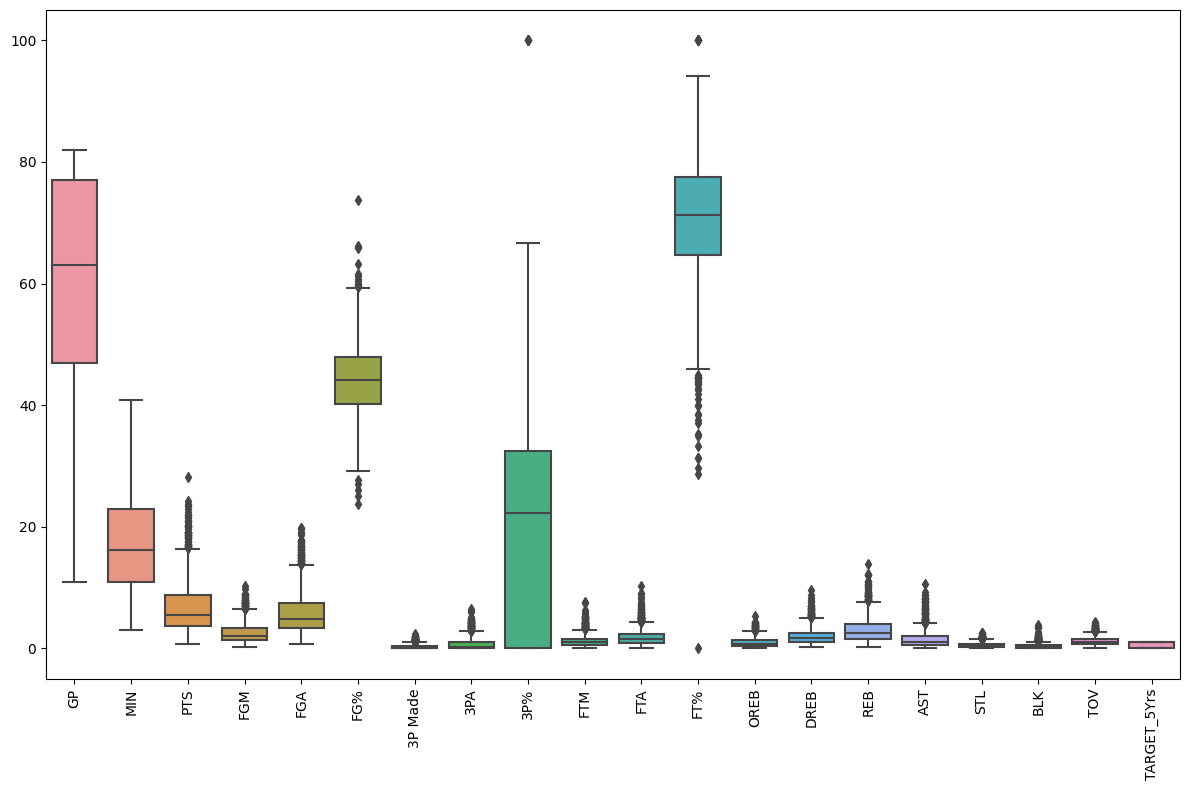

In [61]:
# Create a boxplot for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.select_dtypes(include='number'))

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [62]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler only on the training data
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Apply the same scaling to the test data
X_test_scaled = scaler.transform(X_test)

# Now that our data is cleaned and our features our scaled, we can cross validate classification models and evaluate which performs best

## Here the metric used is Recall: Measures the proportion of true positives out of all actual positives (players who actually last 5 years).
- Precision: Measures the proportion of true positives out of all predicted positives (players predicted to last 5 years). If we believe the cost of falsely predicting that a player will last 5 years is high (e.g., recruiting players that don't last is costly), then it can be argued that would also be an interesting metric, to reduce false positives.

### Logistic regression

In [63]:
# 10-Fold Cross validate model
log_cv_results = cross_validate(LogisticRegression(max_iter=1000), X_train_scaled, y_train_resampled, cv=10,
                            scoring=['recall'])

# Mean Precision score
base_score = log_cv_results['test_recall'].mean()

base_score

0.6825480769230771

### KNN model

In [64]:
# 10-Fold Cross validate model
log_cv_results = cross_validate(KNeighborsClassifier(n_neighbors=5, n_jobs=-1), X_train_scaled, y_train_resampled, cv=10,
                            scoring=['recall'])

# Mean Precision score
knn_score = log_cv_results['test_recall'].mean()

knn_score

0.588173076923077

### SVC model

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

# 10-Fold Cross validate SVM model
svm_cv_results = cross_validate(SVC(), X_train_scaled, y_train_resampled, cv=10, scoring=['recall'], n_jobs=-1)

# Mean Recall score for SVM
svm_score = svm_cv_results['test_recall'].mean()
svm_score


0.6438701923076924

XGBoost Classifier

In [66]:
from xgboost import XGBClassifier

# 10-Fold Cross validate XGBoost model
xgb_cv_results = cross_validate(XGBClassifier(use_label_encoder=False, eval_metric='logloss',), X_train_scaled, y_train_resampled, cv=10, scoring=['recall'], n_jobs=-1)

# Mean Recall score for XGBoost
xgb_score = xgb_cv_results['test_recall'].mean()
xgb_score


0.7274759615384616

In [67]:
print(f'recall score for Logistic Regression: {base_score:.3f}')
print(f'recall score for KNN: {knn_score:.3f}')
print(f'recall score for SVC: {svm_score:.3f}')
print(f'recall score for XGBoost: {xgb_score:.3f}')

recall score for Logistic Regression: 0.683
recall score for KNN: 0.588
recall score for SVC: 0.644
recall score for XGBoost: 0.727


## Cross validation of various Classification model gave best recall score with an XGBoost Classifier
## Using a RandomizedSearch can help us tune the model hyperparameters for potential improvements

In [68]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': np.arange(50, 400, 50),
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': np.arange(3, 10, 1),
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

# Set up the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=50, scoring='recall', cv=10, n_jobs=-1, verbose=1, random_state=42)

# Fit the random search model
random_search.fit(X_train_scaled, y_train_resampled)

# Best parameters found
best_params = random_search.best_params_
best_params

Fitting 10 folds for each of 50 candidates, totalling 500 fits


{'reg_lambda': 0.01,
 'reg_alpha': 1,
 'n_estimators': 50,
 'max_depth': 5,
 'learning_rate': 0.3}

## We can now repeat the cross validation with the best parameters obtained from the randomized search

In [69]:
# Define the model with the best parameters
xgb_best = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    reg_lambda=0.01,
    reg_alpha=1,
    n_estimators=50,
    max_depth=5,
    learning_rate=0.3
)

# Perform cross-validation using 'recall' as the scoring metric
cv_results = cross_validate(xgb_best, X_train_scaled, y_train_resampled, cv=10, scoring='recall', n_jobs=-1, verbose=1)

# Mean recall score
mean_best_recall = cv_results['test_score'].mean()

mean_best_recall.round(3)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


0.734

In [70]:
print(f'Parameters hypertuning improved recall score from {xgb_score:.3f} to {mean_best_recall:.3f}')

Parameters hypertuning improved recall score from 0.727 to 0.734


#### hypertuning did not drastically improve the model performance

---

# Now training the model our best model on the train dataset

In [71]:
xgb_best.fit(X_train_scaled, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=1, reg_lambda=0.01, ...)

## We can now evaluate the model on the unseen test set

In [74]:
# Make predictions on the test set
y_pred_test = xgb_best.predict(X_test_scaled)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the metrics
print(f'Precision on test set: {precision:.4f}')
print(f'Recall on test set: {recall:.4f}')
print(f'F1-Score on test set: {f1:.4f}')


Precision on test set: 0.7784
Recall on test set: 0.7303
F1-Score on test set: 0.7536


## Recall on the train and test sets are similar, suggesting the model generalizes well and does not overfit

## We can also have a look at the ROC-AUC metric to evaluate the models ability to discriminate between classes

ROC-AUC: 0.7311


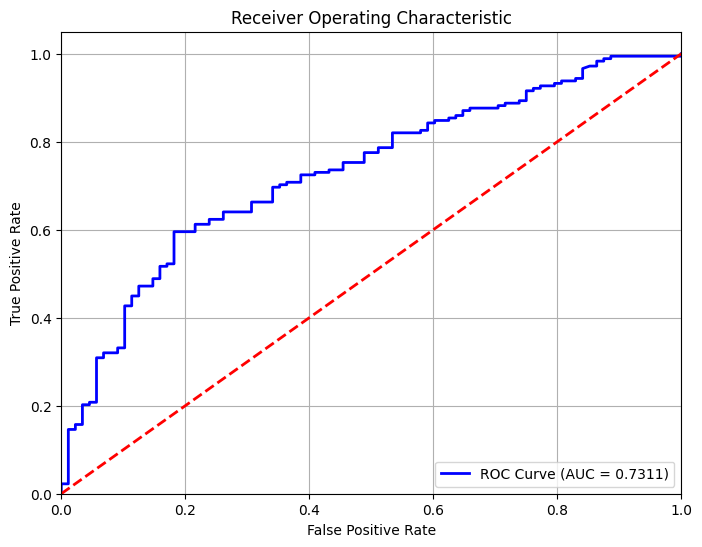

In [77]:
# Generate probability predictions for the positive class
y_prob_test = xgb_best.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print(f'ROC-AUC: {roc_auc:.4f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### ROC-AUC is a robust metric that provides insights into  model's performance for binary classification scenarios with imbalanced datasets.

## We could also look at the learning curves

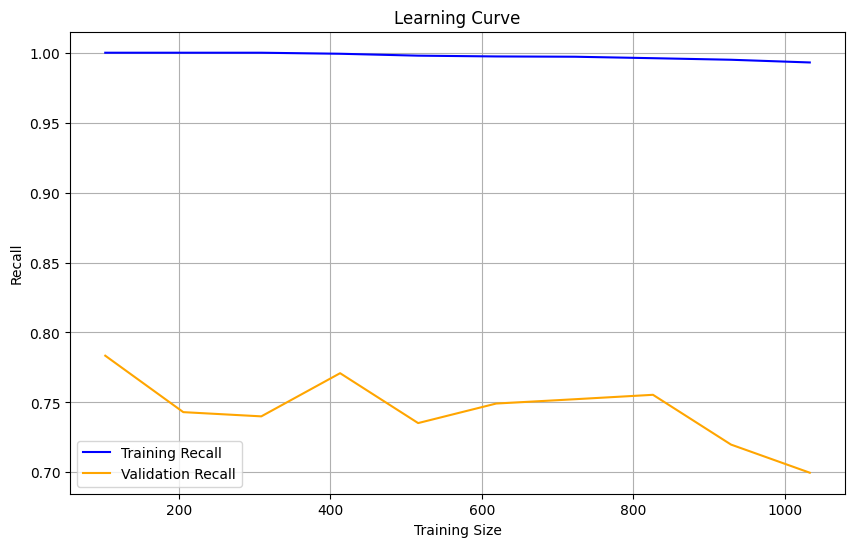

In [85]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        cv=5,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),  # Adjust as needed
        scoring='recall'  # You can also use 'f1', 'precision', or 'accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Recall', color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Validation Recall', color='orange')

    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Call the function using the scaled training set and resampled target
plot_learning_curve(xgb_best, X_train_scaled, y_train_resampled)


## It looks like our model performs very good on the training set but not as good on the validation, which could mean it struggles to generalize
## next steps to further improve the model could be:
- In XGBoost, use the scale_pos_weight parameter to adjust the weights of the classes based on their frequencies, which can help mitigate the effects of class imbalance.
- Ensemble Methods: Techniques such as bagging or boosting can help improve performance on imbalanced datasets
- Feature permutation: We observe thanks to a correlation matrix that some features are correlated, maybe we could remove them to decrease the model complexity. Then Feature permutation involves randomly shuffling the values of a feature to evaluate how much the model's performance decreases when that feature is remove

## Feature importance evaluation with XGBoost

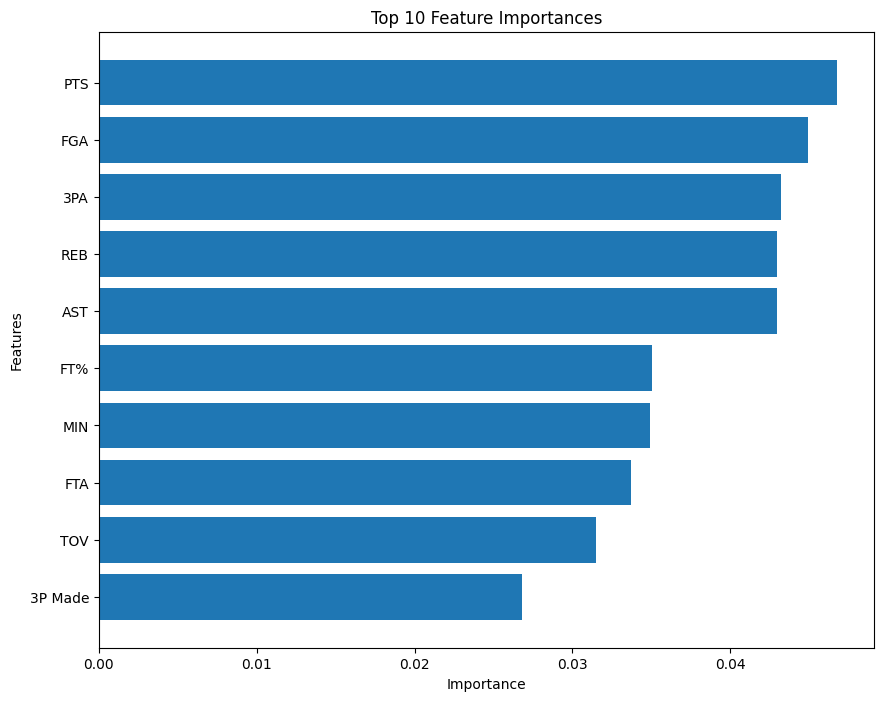

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importance = xgb_best.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is your training DataFrame
    'Importance': importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])  # Adjust the number of features to display
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


## Feature correlation matrix

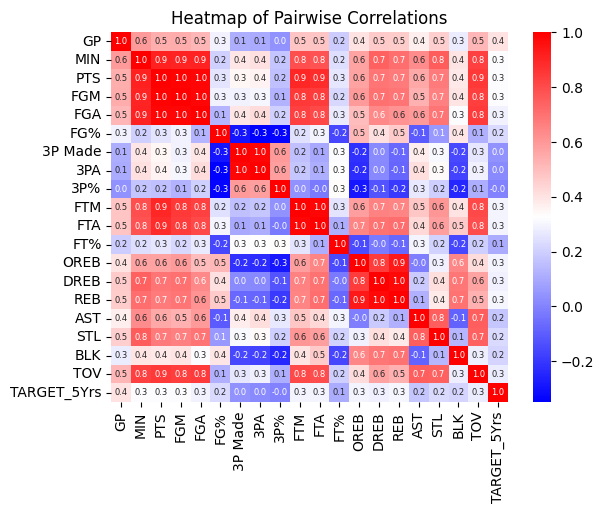

    feature_1 feature_2  correlation  absolute_correlation
62        FGM       PTS     0.990832                 0.991
43        PTS       FGM     0.990832                 0.991
146       3PA   3P Made     0.982674                 0.983
127   3P Made       3PA     0.982674                 0.983
44        PTS       FGA     0.980093                 0.980
82        FGA       PTS     0.980093                 0.980
83        FGA       FGM     0.980261                 0.980
209       FTA       FTM     0.980445                 0.980
190       FTM       FTA     0.980445                 0.980
64        FGM       FGA     0.980261                 0.980


In [86]:
# Heatmap of pairwise correlations
correlation_matrix = data.select_dtypes('number').corr()
column_names = correlation_matrix.columns

# Add correlation coefficients to the heatmap using annot=True
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,
            cmap="bwr", annot=True, fmt=".1f", annot_kws={"size": 6})

plt.title('Heatmap of Pairwise Correlations')
plt.show()

# Convert the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Rename the columns
corr_df.columns = ['feature_1', 'feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

# Compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'].round(3))

# Show the top 5 most correlated pairs of features
top_correlations = corr_df.sort_values(by="absolute_correlation", ascending=False).head(10)
print(top_correlations)


---

# Saving the model

In [90]:
import pickle

# Assuming `model` is your trained model
with open('classifier_model.pkl', 'wb') as file:
    pickle.dump(xgb_best, file)
